![](../MISC/unnamed_1.png)

# Analysing Customer Churn Data - Predicting Behavior to Retain Customers



Rayyan Minhaj (Data Science Intern - 10Pearls)

---

## Module 2: Model Selection, Training, Tuning, and Evaluation
Using a set of Machine Learning algorithms and evaluating their performance in order to give us better insight into predicting customer churn.

In [458]:
import pandas as pd

df = pd.read_csv('processed_churn_data.csv')
df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,True,False,True,False,False,True,True,...,True,False,False,False,True,False,False,True,False,False
1,34,56.95,1889.50,False,True,True,False,True,False,True,...,False,True,False,True,False,False,False,False,True,False
2,2,53.85,108.15,False,True,True,False,True,False,True,...,True,False,False,False,True,False,False,False,True,True
3,45,42.30,1840.75,False,True,True,False,True,False,True,...,False,True,False,True,False,True,False,False,False,False
4,2,70.70,151.65,True,False,True,False,True,False,True,...,True,False,False,False,True,False,False,True,False,True


In [459]:
#optional: converting it to 0s and 1s as opposed to true and false
df = df.map(lambda x: 1 if x is True else (0 if x is False else x))

In [460]:
df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,2,53.85,108.15,0,1,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1


Creating a dataframe to store our results for each model (will be useful later on).

In [393]:
results = pd.DataFrame(columns=['Model Name', 'Accuracy', 'Precision', 'Recall','F1 Score', 'ROC-AUC'])
#results.head()

In [349]:
features = [
    'PaymentMethod_Electronic check', 'PaperlessBilling_Yes', 'Contract_Month-to-month',
    'StreamingMovies_Yes', 'StreamingTV_Yes', 'TechSupport_No', 'DeviceProtection_No', 'OnlineBackup_No',
    'OnlineSecurity_No', 'InternetService_Fiber optic', 'MultipleLines_Yes', 'Dependents_No', 'Partner_No', 
    'SeniorCitizen_1', 'gender_Female', 'MonthlyCharges', 'Contract_Two year', 'InternetService_No', 'tenure'
]

feat2 = [
    'tenure', 'TotalCharges', 'Dependents_Yes', 'InternetService_No', 'Contract_One year', 'Contract_Two year',
    'PaperlessBilling_No', 'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)',
    'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'InternetService_DSL', 'SeniorCitizen_0'  
]

In [461]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Churn'], axis=1)
#X = df.drop(columns=features) #something weird happening here
#X = df[feat2]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [462]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. Logistic Regression

In [396]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000, solver="liblinear")
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [397]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}


results.loc[1] = ['Logisitic Regression', accuracy, precision,recall, f1, roc_auc]



metrics


{'Accuracy': 0.8602324080051647,
 'Precision': 0.8773972602739726,
 'Recall': 0.8345276872964169,
 'F1 Score': 0.8554257095158597,
 'ROC-AUC': 0.9356916145139744}

Performing Cross-Validation and computing the evaluation metrics

In [398]:
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(log_reg, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(log_reg, X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(log_reg, X, y, cv=5, scoring='f1')
cv_roc_auc = cross_val_score(log_reg, X, y, cv=5, scoring='roc_auc')


cv_results = {
    'Accuracy': cv_accuracy.mean(),
    'Precision': cv_precision.mean(),
    'Recall': cv_recall.mean(),
    'F1 Score': cv_f1.mean(),
    'ROC AUC Score': cv_roc_auc.mean()
}

cv_results


{'Accuracy': 0.832766548921897,
 'Precision': 0.860725960482811,
 'Recall': 0.7954681555190348,
 'F1 Score': 0.8074155052687886,
 'ROC AUC Score': 0.9365360703368604}

Plotting the Confusion Matrix

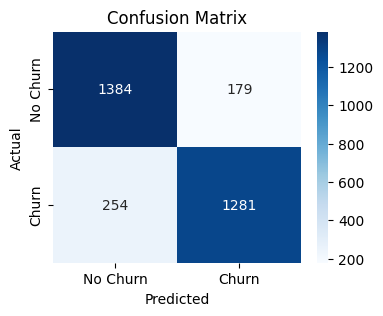

In [399]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

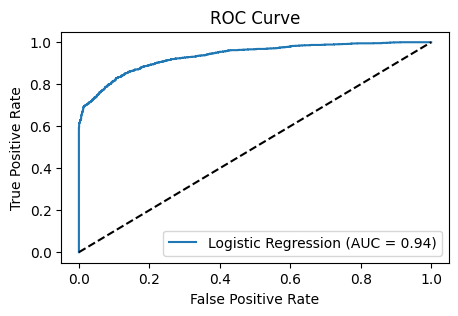

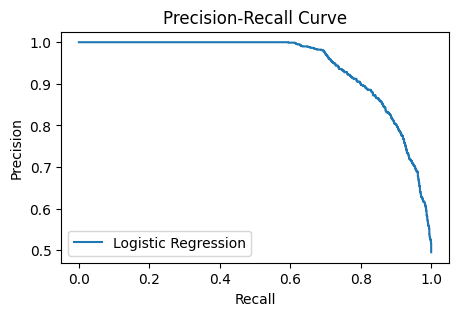

In [400]:
from sklearn.metrics import roc_curve, precision_recall_curve

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


Generating Classification Report

In [401]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])

class_report

'              precision    recall  f1-score   support\n\n    No Churn       0.84      0.89      0.86      1563\n       Churn       0.88      0.83      0.86      1535\n\n    accuracy                           0.86      3098\n   macro avg       0.86      0.86      0.86      3098\nweighted avg       0.86      0.86      0.86      3098\n'

In [457]:
import pickle

model_filename = 'lr_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(log_reg, file)

---

## 2. Decision Trees

In [463]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [464]:
y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}

results.loc[2] = ['Decision Trees', accuracy, precision,recall, f1, roc_auc]


metrics

{'Accuracy': 0.8047127178825049,
 'Precision': 0.8,
 'Recall': 0.8078175895765473,
 'F1 Score': 0.8038897893030794,
 'ROC-AUC': 0.805278623544049}

In [404]:
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(decision_tree, X, y, cv=10, scoring='accuracy')
cv_precision = cross_val_score(decision_tree, X, y, cv=10, scoring='precision')
cv_recall = cross_val_score(decision_tree, X, y, cv=10, scoring='recall')
cv_f1 = cross_val_score(decision_tree, X, y, cv=10, scoring='f1')
cv_roc_auc = cross_val_score(decision_tree, X, y, cv=10, scoring='roc_auc')


cv_results = {
    'Accuracy': cv_accuracy.mean(),
    'Precision': cv_precision.mean(),
    'Recall': cv_recall.mean(),
    'F1 Score': cv_f1.mean(),
    'ROC AUC Score': cv_roc_auc.mean()
}

cv_results


{'Accuracy': 0.8058600111063583,
 'Precision': 0.7972078066158026,
 'Recall': 0.807630111106113,
 'F1 Score': 0.792875773961763,
 'ROC AUC Score': 0.8063091572288249}

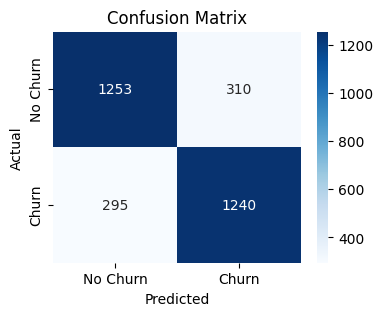

In [465]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

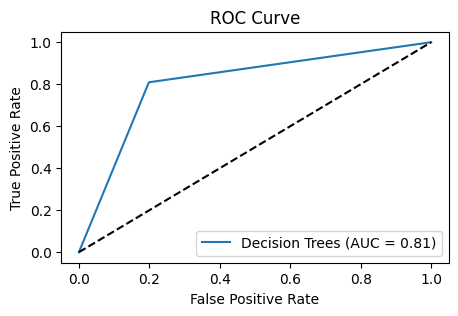

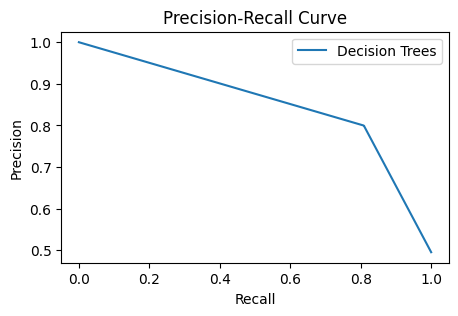

In [466]:
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label='Decision Trees (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label='Decision Trees')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


In [467]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])

class_report

'              precision    recall  f1-score   support\n\n    No Churn       0.81      0.80      0.81      1563\n       Churn       0.80      0.81      0.80      1535\n\n    accuracy                           0.80      3098\n   macro avg       0.80      0.80      0.80      3098\nweighted avg       0.80      0.80      0.80      3098\n'

In [456]:
import pickle

model_filename = 'dt_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(decision_tree, file)

---

## 3. Random Forrest

In [407]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [408]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

In [409]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}

results.loc[3] = ['Random Forest', accuracy, precision,recall, f1, roc_auc]


metrics

{'Accuracy': 0.8557133634602969,
 'Precision': 0.8710777626193724,
 'Recall': 0.8319218241042345,
 'F1 Score': 0.8510496501166278,
 'ROC-AUC': 0.9277702405588517}

In [410]:
cv_accuracy = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(rf, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(rf, X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(rf, X, y, cv=5, scoring='f1')
cv_roc_auc = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')

cv_results = {
    'Accuracy': cv_accuracy.mean(),
    'Precision': cv_precision.mean(),
    'Recall': cv_recall.mean(),
    'F1 Score': cv_f1.mean(),
    'ROC AUC Score': cv_roc_auc.mean()
}

cv_results

{'Accuracy': 0.8389652836539476,
 'Precision': 0.8683848280873263,
 'Recall': 0.7989497737454693,
 'F1 Score': 0.8108735432578374,
 'ROC AUC Score': 0.9347218948324683}

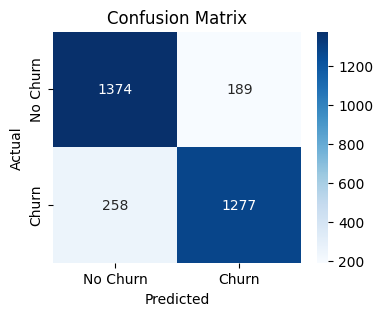

In [411]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

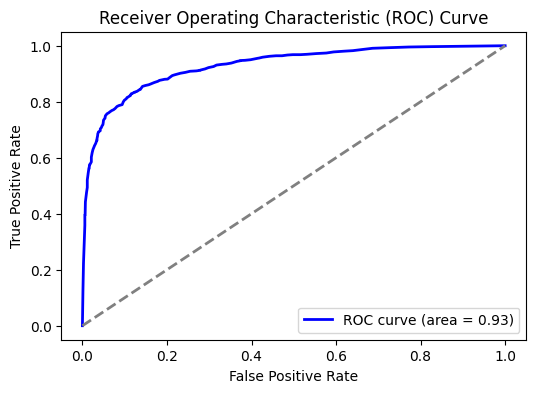

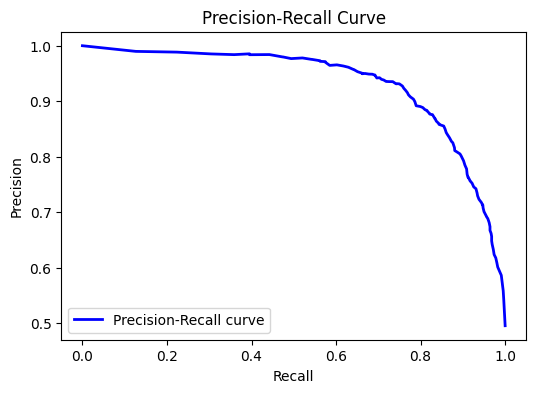

In [412]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(recall_vals, precision_vals, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [413]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])

class_report

'              precision    recall  f1-score   support\n\n    No Churn       0.84      0.88      0.86      1563\n       Churn       0.87      0.83      0.85      1535\n\n    accuracy                           0.86      3098\n   macro avg       0.86      0.86      0.86      3098\nweighted avg       0.86      0.86      0.86      3098\n'

In [455]:
import pickle

model_filename = 'rf_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

## 4. Gradient Boosting

In [468]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [469]:
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

In [470]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

metrics = {
    'Accuracy': accuracy_gb,
    'Precision': precision_gb,
    'Recall': recall_gb,
    'F1 Score': f1_gb,
    'ROC-AUC': roc_auc_gb
}


results.loc[4] = ['Gradient Boosting', accuracy_gb, precision_gb,recall_gb, f1_gb, roc_auc_gb]



metrics

{'Accuracy': 0.8595868302130407,
 'Precision': 0.8623188405797102,
 'Recall': 0.8527687296416938,
 'F1 Score': 0.8575171962004585,
 'ROC-AUC': 0.9364908375899517}

In [439]:
cv_accuracy_gb = cross_val_score(gb, X, y, cv=5, scoring='accuracy')
cv_precision_gb = cross_val_score(gb, X, y, cv=5, scoring='precision')
cv_recall_gb = cross_val_score(gb, X, y, cv=5, scoring='recall')
cv_f1_gb = cross_val_score(gb, X, y, cv=5, scoring='f1')
cv_roc_auc_gb = cross_val_score(gb, X, y, cv=5, scoring='roc_auc')

cv_results = {
    'Accuracy': cv_accuracy_gb.mean(),
    'Precision': cv_precision_gb.mean(),
    'Recall': cv_recall_gb.mean(),
    'F1 Score': cv_f1_gb.mean(),
    'ROC AUC Score': cv_roc_auc_gb.mean()
}

cv_results

{'Accuracy': 0.8359620654010861,
 'Precision': 0.8559579065608987,
 'Recall': 0.8065026602730064,
 'F1 Score': 0.8126798538325725,
 'ROC AUC Score': 0.9400694914537508}

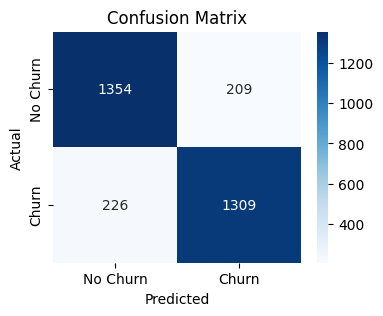

In [440]:
conf_matrix = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

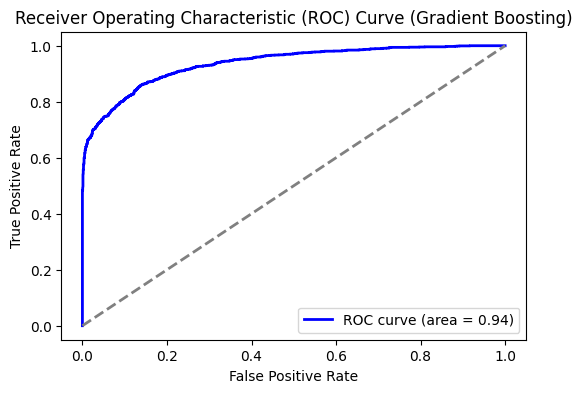

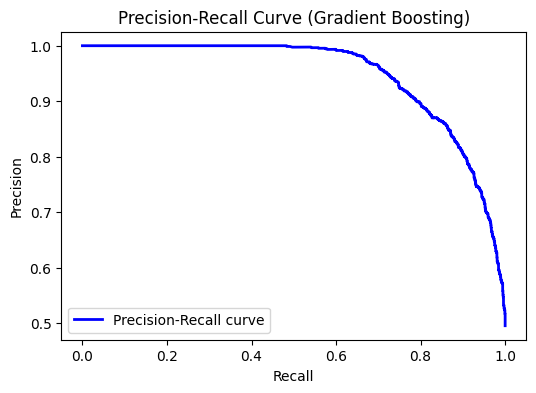

In [441]:
# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_vals_gb, recall_vals_gb, _ = precision_recall_curve(y_test, y_prob_gb)

plt.figure(figsize=(6, 4))
plt.plot(recall_vals_gb, precision_vals_gb, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Gradient Boosting)')
plt.legend(loc="lower left")
plt.show()

In [472]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred_gb, target_names=['No Churn', 'Churn'])

class_report

'              precision    recall  f1-score   support\n\n    No Churn       0.86      0.87      0.86      1563\n       Churn       0.86      0.85      0.86      1535\n\n    accuracy                           0.86      3098\n   macro avg       0.86      0.86      0.86      3098\nweighted avg       0.86      0.86      0.86      3098\n'

In [454]:
import pickle

model_filename = 'gb_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(gb, file)

## 5. Support Vector  Machine

In [447]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [435]:
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

In [449]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

metrics = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm,
    'ROC-AUC': roc_auc_svm
}

results.loc[5] = ['Support Vector Machines', accuracy_svm, precision_svm,recall_svm, f1_svm, roc_auc_svm]


metrics

{'Accuracy': 0.8515171078114913,
 'Precision': 0.8809355067328136,
 'Recall': 0.8097719869706841,
 'F1 Score': 0.8438560760353021,
 'ROC-AUC': 0.9278156722747745}

In [ ]:
cv_accuracy_svm = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
cv_precision_svm = cross_val_score(svm, X, y, cv=5, scoring='precision')
cv_recall_svm = cross_val_score(svm, X, y, cv=5, scoring='recall')
cv_f1_svm = cross_val_score(svm, X, y, cv=5, scoring='f1')
cv_roc_auc_svm = cross_val_score(svm, X, y, cv=5, scoring='roc_auc')

cv_results = {
    'Accuracy': cv_accuracy_svm.mean(),
    'Precision': cv_precision_svm.mean(),
    'Recall': cv_recall_svm.mean(),
    'F1 Score': cv_f1_svm.mean(),
    'ROC AUC Score': cv_roc_auc_svm.mean()
}

cv_results

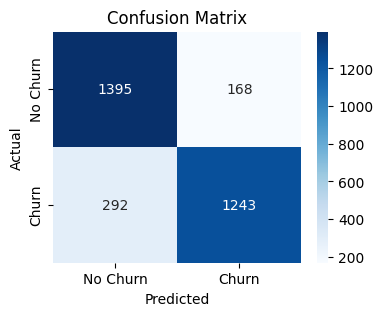

In [450]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

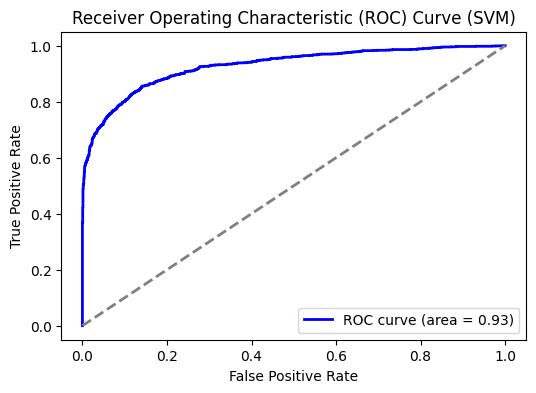

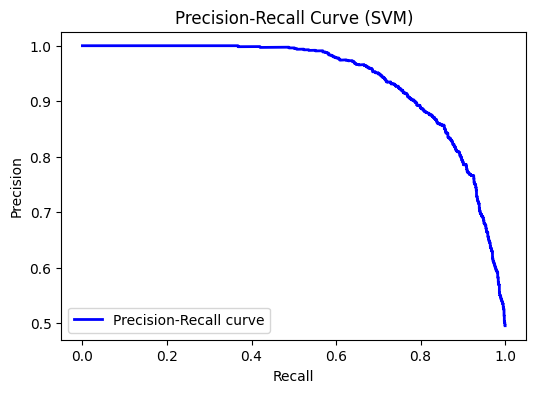

In [451]:
# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc="lower right")
plt.show()



# Precision-Recall Curve
precision_vals_svm, recall_vals_svm, _ = precision_recall_curve(y_test, y_prob_svm)

plt.figure(figsize=(6, 4))
plt.plot(recall_vals_svm, precision_vals_svm, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend(loc="lower left")
plt.show()

In [473]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred_svm, target_names=['No Churn', 'Churn'])

class_report

'              precision    recall  f1-score   support\n\n    No Churn       0.83      0.89      0.86      1563\n       Churn       0.88      0.81      0.84      1535\n\n    accuracy                           0.85      3098\n   macro avg       0.85      0.85      0.85      3098\nweighted avg       0.85      0.85      0.85      3098\n'

In [453]:
import pickle

model_filename = 'svm_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(svm, file)

#print(f"Model saved to {model_filename}")

Model saved to svm_model.pkl


## 6. Ensemble (Decision-Level Fusion - Majority Voting)

 Decision-level fusion involves combining the outputs (decisions) of individual classifiers using methods such as majority voting, weighted voting, or stacking. Were going to be using Majority Voting.

In [475]:
from sklearn.ensemble import VotingClassifier
with open('PickleFiles/lr_model.pkl', 'rb') as file:
    logistic_regression = pickle.load(file)

with open('PickleFiles/dt_model.pkl', 'rb') as file:
    decision_tree = pickle.load(file)

with open('PickleFiles/rf_model.pkl', 'rb') as file:
    random_forest = pickle.load(file)

with open('PickleFiles/gb_model.pkl', 'rb') as file:
    gradient_boosting = pickle.load(file)

with open('PickleFiles/svm_model.pkl', 'rb') as file:
    svm = pickle.load(file)

In [482]:
import numpy as np

y_pred_lr = logistic_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_svm = svm.predict(X_test)

#Majority Voting
y_pred_majority = np.array([y_pred_lr, y_pred_dt, y_pred_rf, y_pred_gb, y_pred_svm]).T #compiling the results in a array and transposing
y_pred_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=y_pred_majority) #converts the matrix of predictions into a single array of predictions by majority voting.


In [484]:
accuracy_majority = accuracy_score(y_test, y_pred_majority)
precision_majority = precision_score(y_test, y_pred_majority)
recall_majority = recall_score(y_test, y_pred_majority)
f1_majority = f1_score(y_test, y_pred_majority)
roc_auc_majority = roc_auc_score(y_test, np.mean([logistic_regression.predict_proba(X_test)[:, 1],
                                                  decision_tree.predict_proba(X_test)[:, 1],
                                                  random_forest.predict_proba(X_test)[:, 1],
                                                  gradient_boosting.predict_proba(X_test)[:, 1],
                                                  svm.predict_proba(X_test)[:, 1]], axis=0))


metrics = {
    'Accuracy': accuracy_majority,
    'Precision': precision_majority,
    'Recall': recall_majority,
    'F1 Score': f1_majority,
    'ROC-AUC': roc_auc_majority
}

metrics


{'Accuracy': 0.8612007746933505,
 'Precision': 0.8740690589031821,
 'Recall': 0.8410423452768729,
 'F1 Score': 0.8572377158034529,
 'ROC-AUC': 0.9338981037468662}

In [485]:
results.loc[6] = ['Decision Level Fusion', accuracy_majority, precision_majority, recall_majority, f1_majority, roc_auc_majority]

## Results

In [486]:
results

,Model Name,Accuracy,Precision,Recall,F1 Score,ROC-AUC
1,Logisitic Regression,0.860232,0.877397,0.834528,0.855426,0.935692
2,Decision Trees,0.804713,0.800000,0.807818,0.803890,0.805279
3,Random Forest,0.855713,0.871078,0.831922,0.851050,0.927770
4,Gradient Boosting,0.859587,0.862319,0.852769,0.857517,0.936491
5,Support Vector Machines,0.851517,0.880936,0.809772,0.843856,0.927816
6,Decision Level Fusion,0.861201,0.874069,0.841042,0.857238,0.933898


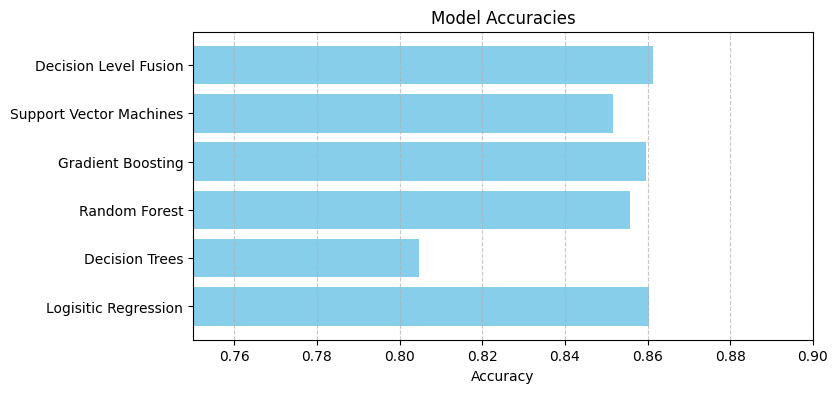

In [492]:
plt.figure(figsize=(8, 4))
plt.barh(results['Model Name'], results['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.xlim(0.75, 0.9)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Logistic Regression
* Logistic Regression performs the best in terms of accuracy, precision, recall, and F1 score.
* ROC-AUC score indicates it has a strong ability to distinguish between classes.
* Logistic Regression works well when the relationship between features and the target is roughly linear.

### Decision Tree
* DTrees are prone to overfitting, especially with noisy data or when the tree becomes too complex.
* The performance might be affected by the lack of sufficient depth or pruning.

### Random Forest
* Random Forest performs well, with high accuracy and balanced precision and recall.
* It handles overfitting better than Decision Trees by averaging multiple trees.
* The slightly lower performance compared to Gradient Boosting might be due to the way trees are combined (majority voting vs. boosting).

### Gradient Boosting
* Gradient Boosting shows the best performance among all models in terms of ROC-AUC, indicating strong classification capabilities.
* It builds trees sequentially, focusing on correcting errors from previous trees, which often leads to better performance (and reduced overfitting).

### Support Vector Machines (SVM)
* SVM performs well with high precision and a good balance of other metrics.
* The performance might slightly lag behind Gradient Boosting due to its sensitivity to the correct choice of kernel and regularization parameters.

---

## Interpreting the Results (CAUTION!)

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 1000/1000 [2:39:48<00:00,  9.59s/it] 


SHAP summary plot:


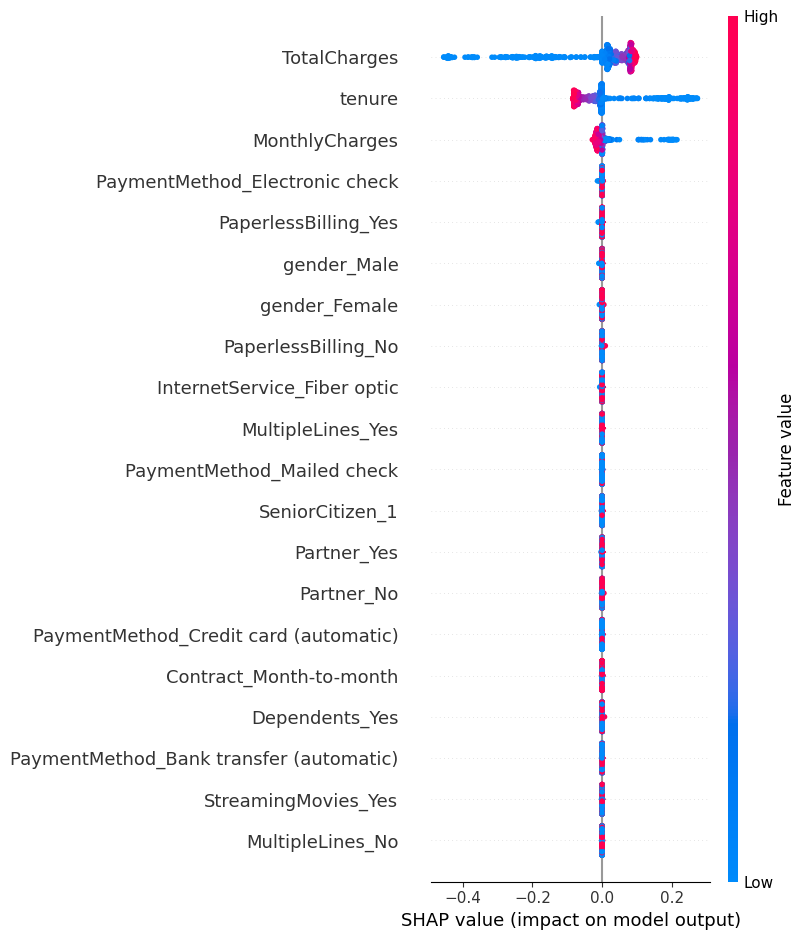

Top features:


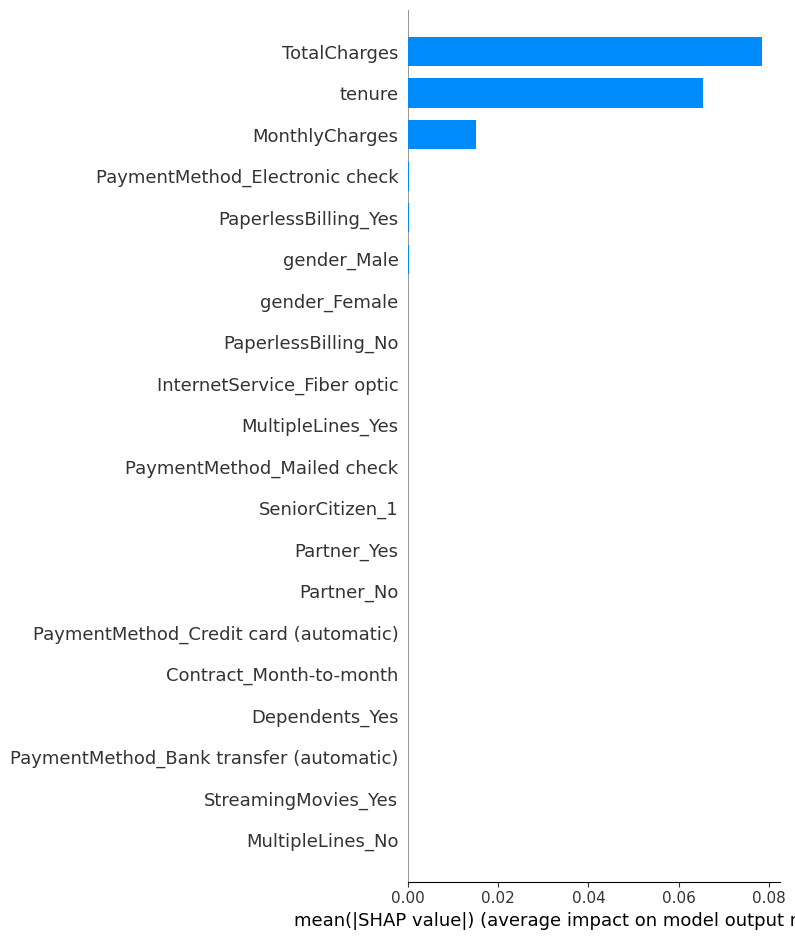

In [500]:
import pickle
import shap

model_path = 'PickleFiles/lr_model.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

data = pd.read_csv('processed_churn_data.csv')

X = data.drop(columns=['Churn'])

sample_size = 1000  #Please note that the entire dataset of 10,000+ rows was taking too long
X_sample = shap.sample(X, sample_size)


explainer = shap.KernelExplainer(model.predict, X_sample)
shap_values = explainer.shap_values(X_sample)

print("SHAP summary plot:")
shap.summary_plot(shap_values, X_sample)

print("Top features:")
shap.summary_plot(shap_values, X_sample, plot_type="bar")
